In [1]:
# Needed packages
import pandas as pd
import numpy as np

In [2]:
# Grouping the files
file_numbers = np.arange(1,13)

for i in file_numbers:
    file_name = 'Raw_data/spectra' + str(i)
    col = pd.read_csv(file_name, header = None, sep = '\t')
    if (i == 1):
        APSDs_data = col.iloc[:, :2]
    else:
        col = col.iloc[:, 1]
        APSDs_data[i] = col

In [3]:
# Frequency column
Dwell_Time = 5E-6 # seconds
number_of_channels = 62500
average_APSD = pd.DataFrame({'Frequency': APSDs_data[0]/ \
                             (Dwell_Time * number_of_channels)})

In [4]:
# Mean APSD column
# pd.set_option('display.float_format', '{:.5E}'.format)
average_APSD['APSD'] = APSDs_data.iloc[:, 1:].mean(axis = 1)
average_APSD['APSD'] = [np.format_float_scientific(i, 5) for i in average_APSD['APSD']]

In [5]:
# APSD uncertainty column
number_of_averages = 3000
average_APSD['sd'] = (APSDs_data.iloc[:,1:]**2).sum(axis = 1)**0.5/ \
                     ((APSDs_data.columns.size - 1)*np.sqrt(number_of_averages))
average_APSD['sd'] = [np.format_float_scientific(i, 5) for i in average_APSD['sd']]

In [6]:
# Final dataset
# The first two columns have to be eliminated
average_APSD = average_APSD[2:]
average_APSD.head()

,Frequency,APSD,sd
2,9.6,2.15356e-07,1.13521e-09
3,12.8,2.13221e-07,1.12396e-09
4,16.0,2.13335e-07,1.12467e-09
5,19.2,2.14046e-07,1.12825e-09
6,22.4,2.15162e-07,1.13422e-09


In [64]:
# Salving the final dataset
# average_APSD.to_csv('average_APSD_286ppm_nat_boron_Python.csv', index = False) 

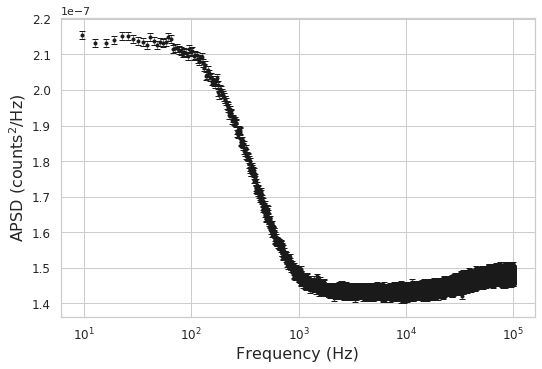

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array(average_APSD.iloc[:,0], dtype = float)
y = np.array(average_APSD.iloc[:,1], dtype = float)
err = np.array(average_APSD.iloc[:,2], dtype = float)

# Figure
plt.figure(figsize = (8.5,5.5))
plt.errorbar(x, y, yerr = err, fmt='.k', lw = 0.5, capsize = 3)
plt.xscale('log')
#plt.xlim(9, 1E5)
plt.xlabel('Frequency (Hz)', fontsize = 16)
plt.xticks(fontsize = 12)
plt.ylabel(r'APSD (counts$^{2}$/Hz)', fontsize = 16)
plt.yticks(fontsize = 12)
plt.savefig('average_APSD_286ppm_nat_boron_Python.png')
plt.show()